In [64]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [65]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
validate = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [66]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28*28))
test_img = np.resize(test, (test.shape[0], 28*28))

TypeError: Invalid shape (784,) for image data

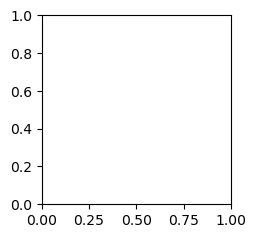

In [67]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

# PCA


In [24]:
pca = PCA(n_components=50)

In [30]:
pca.fit(train_img.reshape(train_img.shape[0], -1))

PCA(n_components=50)

In [31]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367, 0.00588913, 0.00564335,
       0.00540967, 0.00509222, 0.00487505, 0.00475569, 0.00466545,
       0.00452952, 0.00444989, 0.00418255, 0.00397506, 0.00384542,
       0.00374919, 0.00361013, 0.00348522, 0.00336488, 0.00320738])

In [33]:
X = pca.transform(train_img.reshape(train_img.shape[0], -1))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, train_label, test_size=0.2, random_state=42)

In [45]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [46]:
rf.score(X_test, y_test)

0.9339285714285714

In [49]:
valid_predict = rf.predict(pca.transform(test_img.reshape(test_img.shape[0], -1)))

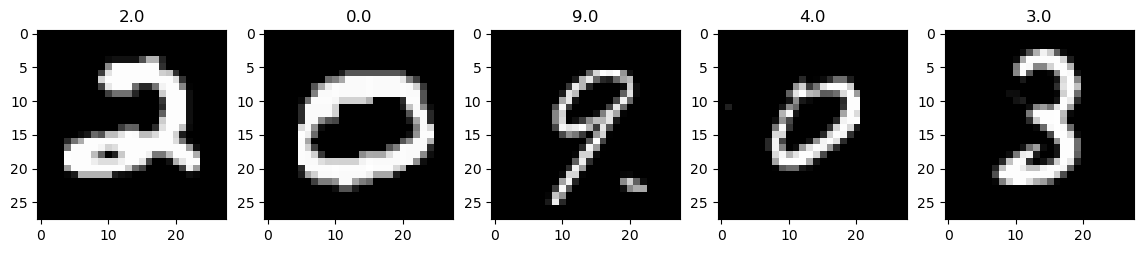

In [58]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5],1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img.reshape(28,28), cmap='gray');
    subplot.set_title('%s' % valid_predict[i-1]);

In [63]:
header = 'ImageId,Label'
rows = np.arange(1, len(valid_predict) + 1).reshape(-1, 1) 
predict_with_index = np.hstack((rows, valid_predict.reshape(-1, 1)))
np.savetxt(
    'dz1_pred.csv', 
    predict_with_index,
    delimiter=',',
    fmt='%d',
    header=header,
    comments=''
)
